# Challenge: Validating a linear regression.

Statistical tests are useful for making sure a model is a good fit to the test data, and that all the features are useful to the model. However, to make sure a model has good predictive validity for new data, it is necessary to assess the performance of the model on new datasets.

The procedure is the same as what you learned in the Naive Bayes lesson – the holdout method and cross-validation method are both available. You've already had experience writing code to run these kinds of validation models for Naive Bayes: now you can try it again with linear regression. In this case, your goal is to achieve a model with a consistent R2 and only statistically significant parameters across multiple samples.

We'll use the property crime model you've been working on with, based on the FBI:UCR data. Since your model formulation to date has used the entire New York State 2013 dataset, you'll need to validate it using some of the other crime datasets available at the FBI:UCR website. Options include other states crime rates in 2013 or crime rates in New York State in other years or a combination of these.

Based on my result of "Challenge 2.4.4", I initially fit a linear regression model with 2013 New York State dataset. I will validate this model with 2014 New York State dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [2]:
df = pd.read_excel('./data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [3]:
df = df.set_index('City')
df.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
City,,,,,,,,,,,,
Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [4]:
df = df.drop(['Violent\ncrime', 'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2', 
         'Aggravated\nassault', 'Burglary', 'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'], axis=1)
df.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
City,,,,
Adams Village,1861.0,0.0,0.0,12.0
Addison Town and Village,2577.0,0.0,0.0,24.0
Akron Village,2846.0,0.0,0.0,16.0
Albany,97956.0,8.0,227.0,4090.0
Albion Village,6388.0,0.0,4.0,223.0


In [5]:
df = df.rename(index=str, columns={'Population':'Pop', 'Murder and\nnonnegligent\nmanslaughter':'Murder', 
                                  'Property\ncrime':'Prop'})
df.head()

,Pop,Murder,Robbery,Prop
City,,,,
Adams Village,1861.0,0.0,0.0,12.0
Addison Town and Village,2577.0,0.0,0.0,24.0
Akron Village,2846.0,0.0,0.0,16.0
Albany,97956.0,8.0,227.0,4090.0
Albion Village,6388.0,0.0,4.0,223.0


In [6]:
df = df.dropna(axis=0)
df.shape

(348, 4)

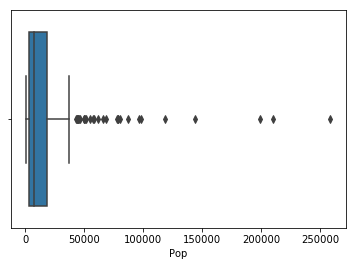

In [7]:
df = df.drop('New York')

sns.boxplot(x='Pop', data=df)
plt.show()

In [8]:
df['Pop_Sq'] = df['Pop']**2
df['Murder_Cat'] = np.where(df['Murder']>0, 1, 0)
df['Roberry_Cat'] = np.where(df['Robbery']>0, 1, 0)
df['Pop_Sqrt'] = np.sqrt(df['Pop'])
df['Pop_Log'] = np.log(df['Pop'])

df['Murder_Sqrt'] = np.sqrt(df['Murder'])
df['Roberry_Sqrt'] = np.sqrt(df['Robbery'])

df['Murder_Log'] = np.log(1 + df['Murder'])
df['Roberry_Log'] = np.log(1+ df['Robbery'])


df['Prop_Log'] = np.log(1 + df['Prop'])

df.head()

,Pop,Murder,Robbery,Prop,Pop_Sq,Murder_Cat,Roberry_Cat,Pop_Sqrt,Pop_Log,Murder_Sqrt,Roberry_Sqrt,Murder_Log,Roberry_Log,Prop_Log
City,,,,,,,,,,,,,,
Adams Village,1861.0,0.0,0.0,12.0,3.463321e+06,0,0,43.139309,7.528869,0.000000,0.000000,0.000000,0.000000,2.564949
Addison Town and Village,2577.0,0.0,0.0,24.0,6.640929e+06,0,0,50.764161,7.854381,0.000000,0.000000,0.000000,0.000000,3.218876
Akron Village,2846.0,0.0,0.0,16.0,8.099716e+06,0,0,53.347915,7.953670,0.000000,0.000000,0.000000,0.000000,2.833213
Albany,97956.0,8.0,227.0,4090.0,9.595378e+09,1,1,312.979233,11.492274,2.828427,15.066519,2.197225,5.429346,8.316545
Albion Village,6388.0,0.0,4.0,223.0,4.080654e+07,0,1,79.924965,8.762177,0.000000,2.000000,0.000000,1.609438,5.411646


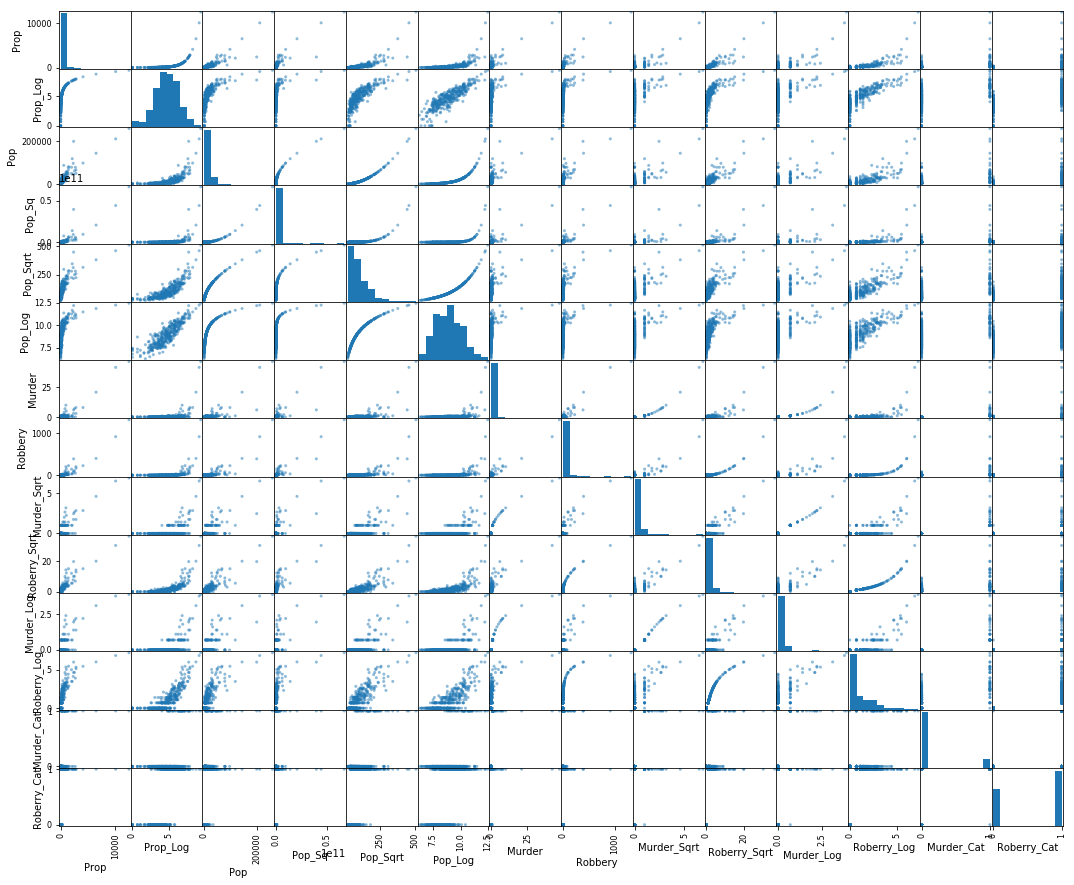

In [9]:
pd.plotting.scatter_matrix(df[['Prop', 'Prop_Log',
                               'Pop', 'Pop_Sq', 'Pop_Sqrt', 'Pop_Log',
                               'Murder', 'Robbery', 'Murder_Sqrt', 'Roberry_Sqrt', 'Murder_Log', 'Roberry_Log',
                               'Murder_Cat','Roberry_Cat']], 
                           figsize=(18,15))
plt.show()

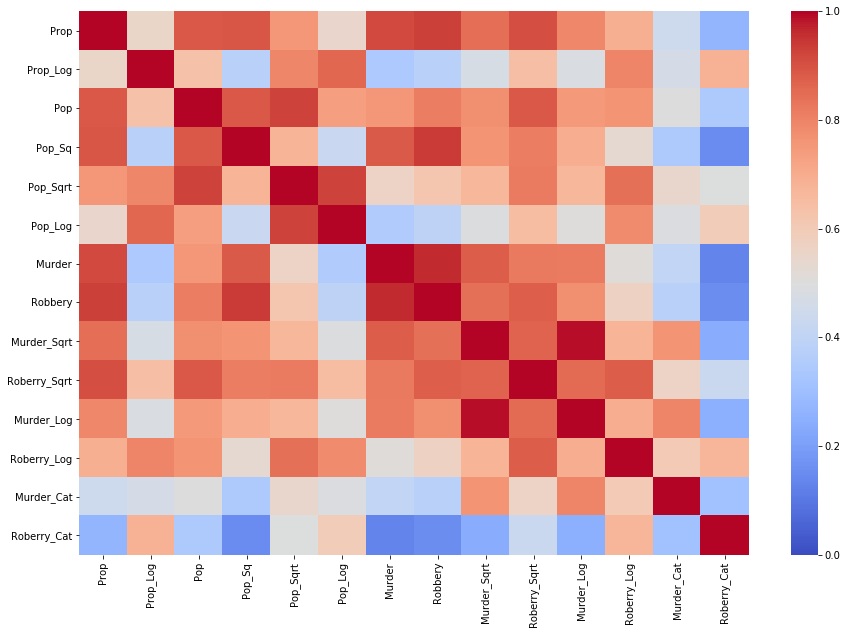

In [10]:
plt.subplots(figsize=(15,10))
sns.heatmap(df[['Prop', 'Prop_Log',
                'Pop', 'Pop_Sq', 'Pop_Sqrt', 'Pop_Log', 
                'Murder', 'Robbery', 'Murder_Sqrt', 'Roberry_Sqrt', 'Murder_Log', 'Roberry_Log', 
                'Murder_Cat','Roberry_Cat']].corr(),
           cmap ='coolwarm', vmin=0., vmax=1.)
plt.show()

/Users/hwanpyokim/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)



Coefficients: 
 [  1.46723035e-04  -2.95182688e-10  -6.59806779e-02   2.38992061e+00
   1.27736097e-02   9.18839680e-03  -4.13263394e-01  -2.67989379e-01
   3.29229749e-01   7.40732263e-01   1.93069518e-01   4.62112660e-01]

Intercept: 
 -12.5427328297

R-squared:
0.815949700848


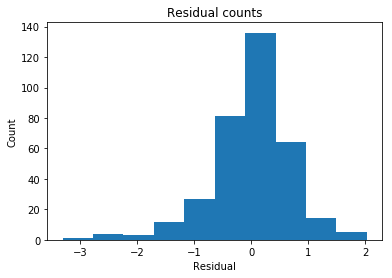

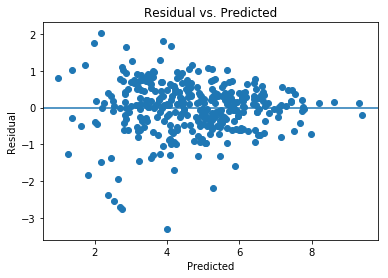

In [11]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Prop_Log']
X = df[['Pop', 'Pop_Sq', 'Pop_Sqrt', 'Pop_Log', 
        'Murder', 'Robbery', 'Murder_Sqrt', 'Roberry_Sqrt', 'Murder_Log', 'Roberry_Log', 
        'Murder_Cat','Roberry_Cat']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [12]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [13]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Prop_Log ~ Pop + Pop_Sq + Pop_Sqrt + Pop_Log + Murder + Murder_Sqrt + Murder_Log + Murder_Cat + Robbery + Roberry_Sqrt + Roberry_Log + Roberry_Cat'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Prop_Log   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     123.4
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          7.56e-115
Time:                        16:57:39   Log-Likelihood:                -371.85
No. Observations:                 347   AIC:                             769.7
Df Residuals:                     334   BIC:                             819.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.5427      2.228     -5.629   

In [14]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Prop_Log ~ Pop +Pop_Sq + Pop_Sqrt + Pop_Log + Roberry_Log + Roberry_Cat'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Prop_Log   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     246.9
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          1.21e-120
Time:                        16:57:39   Log-Likelihood:                -374.33
No. Observations:                 347   AIC:                             762.7
Df Residuals:                     340   BIC:                             789.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.5149      1.914     -5.493      

In [15]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Prop_Log ~ Pop + Pop_Sqrt + Pop_Log + Roberry_Sqrt + Roberry_Cat'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Prop_Log   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     278.8
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          4.21e-118
Time:                        16:57:39   Log-Likelihood:                -383.25
No. Observations:                 347   AIC:                             778.5
Df Residuals:                     341   BIC:                             801.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.6522      1.259     -4.488   

In [16]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Prop_Log ~ Pop_Log + Roberry_Sqrt + Roberry_Cat'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Prop_Log   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     451.6
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          9.95e-119
Time:                        16:57:39   Log-Likelihood:                -388.02
No. Observations:                 347   AIC:                             784.0
Df Residuals:                     343   BIC:                             799.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.6833      0.408     -9.031   


Coefficients: 
 [ 0.86930282  0.05572643  0.86271308]

Intercept: 
 -3.68329512357

R-squared:
0.797977360715


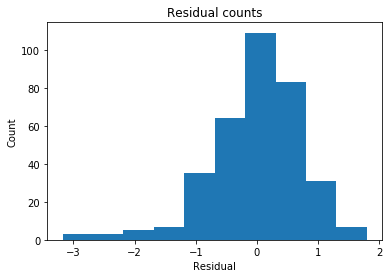

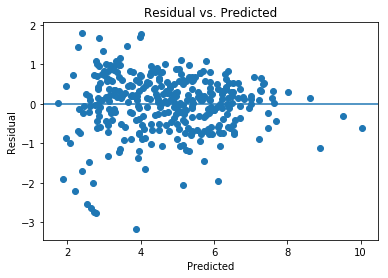

In [17]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Prop_Log']
X = df[['Pop_Log', 'Roberry_Sqrt','Roberry_Cat']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Iterate



In [18]:
df_new = pd.read_excel('./data/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls', header=4)
df_new.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0
1,Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0
2,Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0


In [19]:
df_new = df_new.set_index('City')
df_new.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
City,,,,,,,,,,,,
Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0
Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0
Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0
Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0


In [20]:
df_new = df_new.drop(['Violent\ncrime', 'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2', 
         'Aggravated\nassault', 'Burglary', 'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'], axis=1)
df_new.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
City,,,,
Adams Village,1851.0,0.0,0.0,11.0
Addison Town and Village,2568.0,0.0,1.0,49.0
Afton Village4,820.0,0.0,0.0,1.0
Akron Village,2842.0,0.0,0.0,17.0
Albany4,98595.0,8.0,237.0,3888.0


In [21]:
df_new = df_new.rename(index=str, columns={'Population':'Pop', 'Murder and\nnonnegligent\nmanslaughter':'Murder', 
                                  'Property\ncrime':'Prop'})
df_new.shape

(376, 4)

In [22]:
df_new = df_new.dropna(axis=0)
df_new.shape

(368, 4)

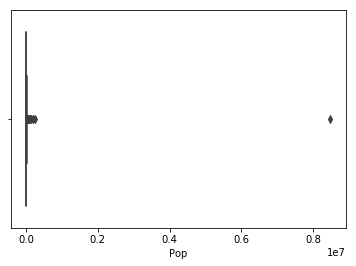

In [23]:
sns.boxplot(x='Pop', data=df_new)
plt.show()

In [24]:
df_new.Pop.idxmax()

'New York4'

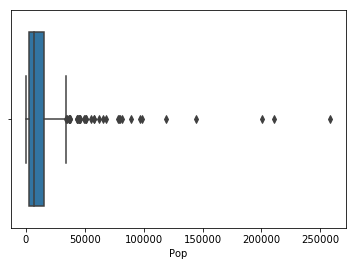

In [25]:
df_new = df_new.drop('New York4')

sns.boxplot(x='Pop', data=df_new)
plt.show()

In [26]:
df_new['Pop_Log'] = np.log(df_new['Pop'])
df_new['Roberry_Sqrt'] = np.sqrt(df_new['Robbery'])
df_new['Roberry_Cat'] = np.where(df_new['Robbery']>0, 1, 0)

df_new['Prop_Log'] = np.log(1 + df_new['Prop'])

df_new.head()

,Pop,Murder,Robbery,Prop,Pop_Log,Roberry_Sqrt,Roberry_Cat,Prop_Log
City,,,,,,,,
Adams Village,1851.0,0.0,0.0,11.0,7.523481,0.000000,0,2.484907
Addison Town and Village,2568.0,0.0,1.0,49.0,7.850883,1.000000,1,3.912023
Afton Village4,820.0,0.0,0.0,1.0,6.709304,0.000000,0,0.693147
Akron Village,2842.0,0.0,0.0,17.0,7.952263,0.000000,0,2.890372
Albany4,98595.0,8.0,237.0,3888.0,11.498776,15.394804,1,8.265907


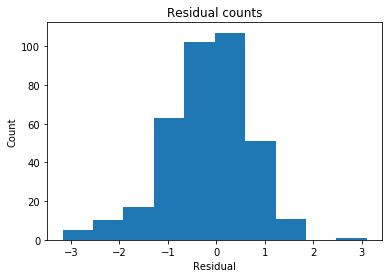

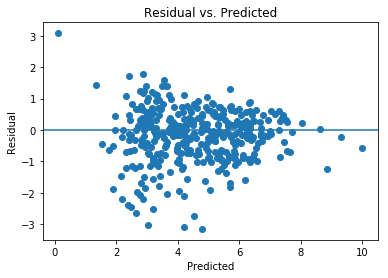

In [27]:
Y_new = df_new['Prop_Log']
X_new = df_new[['Pop_Log', 'Roberry_Sqrt','Roberry_Cat']]

# Extract predicted values.
predicted = regr.predict(X_new).ravel()
actual = Y_new

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X_new, Y_new, cv=5)

array([ 0.83458163,  0.69038467,  0.67117405,  0.74013717,  0.73299465])